In [1]:
import datetime

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as pdr
import sklearn
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.model_selection


API: str = 'yahoo'
START_DATE: str = '2020-12-01'

df_aapl = pdr.data.DataReader('AAPL', API, START_DATE)
df_gold = pdr.data.DataReader('GLD', API, START_DATE)
df_spc =  pdr.data.DataReader('^GSPC', API, START_DATE)
df_n225 =  pdr.data.DataReader('^N225', API, START_DATE)

df_gold.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-12-07,166.639999,165.320007,165.470001,166.330002,4610700,166.330002
2022-12-08,167.050003,166.070007,166.580002,166.470001,3217900,166.470001
2022-12-09,168.089996,166.600006,167.259995,167.059998,5430400,167.059998
2022-12-12,166.600006,165.429993,166.440002,165.679993,3504400,165.679993
2022-12-13,169.789993,168.020004,169.210007,168.509995,6746800,168.509995


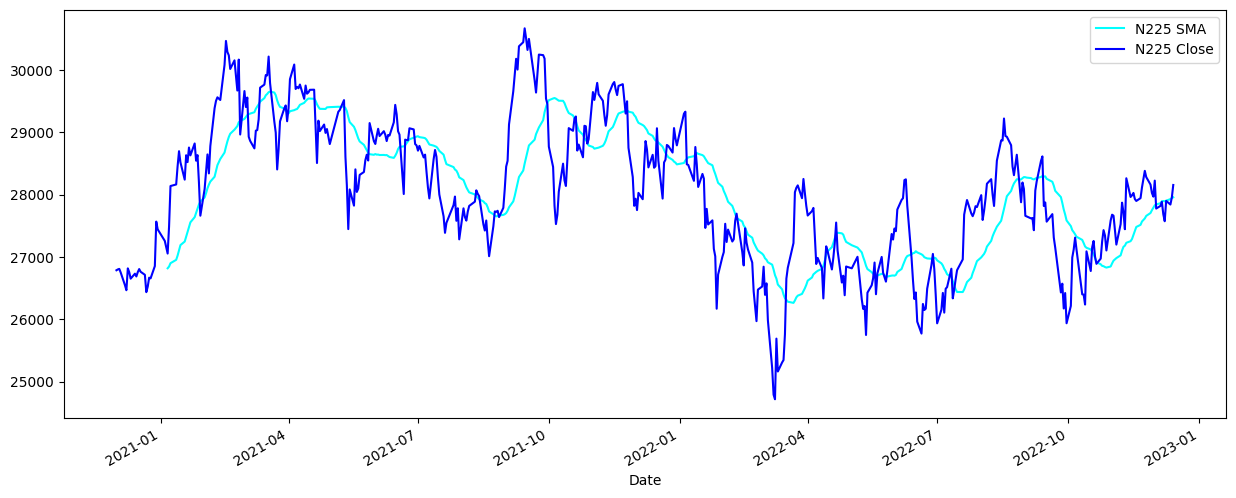

In [2]:
"""Data analsys
"""
# Simple moving average
df_n225['SMA'] = df_n225['Close'].rolling(window=25).mean()
df_n225['SMA'].plot(figsize=(15,6), color='cyan', label='N225 SMA')

# Closing price
df_n225['Close'].plot(figsize=(15,6), color='blue', label='N225 Close')

plt.legend()
plt.show()

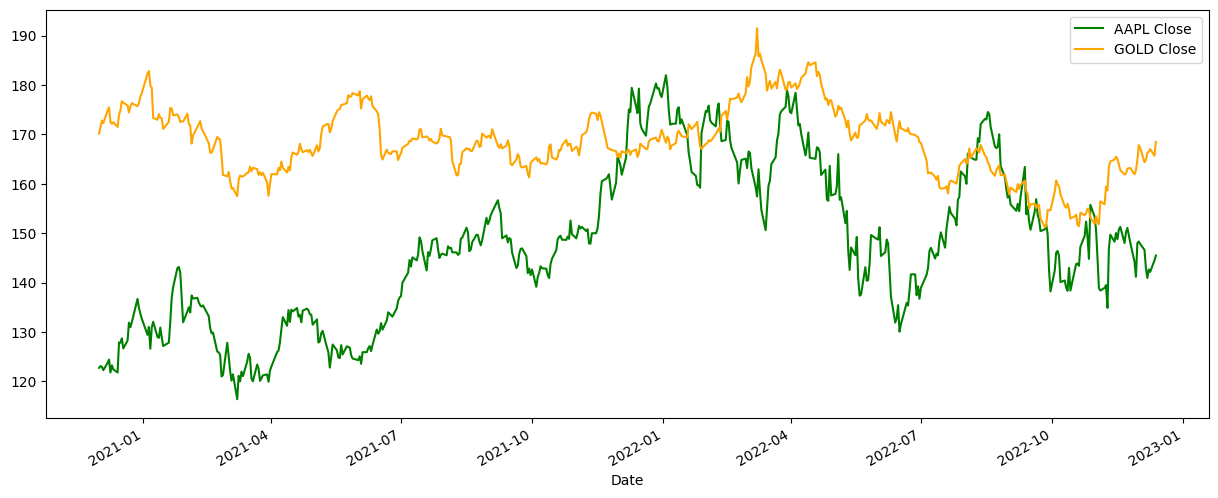

In [3]:
# Attempt data mining from closing price correlations.
df_aapl['Close'].plot(figsize=(15,6), color='green', label='AAPL Close')
df_gold['Close'].plot(figsize=(15,6), color='orange', label='GOLD Close')
plt.legend()
plt.show()

In [4]:
def daily_price_change(df):
    """Return Daily stock price change.
    """
    return ((df['Close'] - df['Open']) / df['Open']) * 100


df_aapl['changing'] = daily_price_change(df_aapl)
df_gold['changing'] = daily_price_change(df_gold)
df_spc['changing'] = daily_price_change(df_spc)
df_n225['changing'] = daily_price_change(df_n225)

df_gold.tail(3).round(2)

,High,Low,Open,Close,Volume,Adj Close,changing
Date,,,,,,,
2022-12-09,168.09,166.60,167.26,167.06,5430400,167.06,-0.12
2022-12-12,166.60,165.43,166.44,165.68,3504400,165.68,-0.46
2022-12-13,169.79,168.02,169.21,168.51,6746800,168.51,-0.41


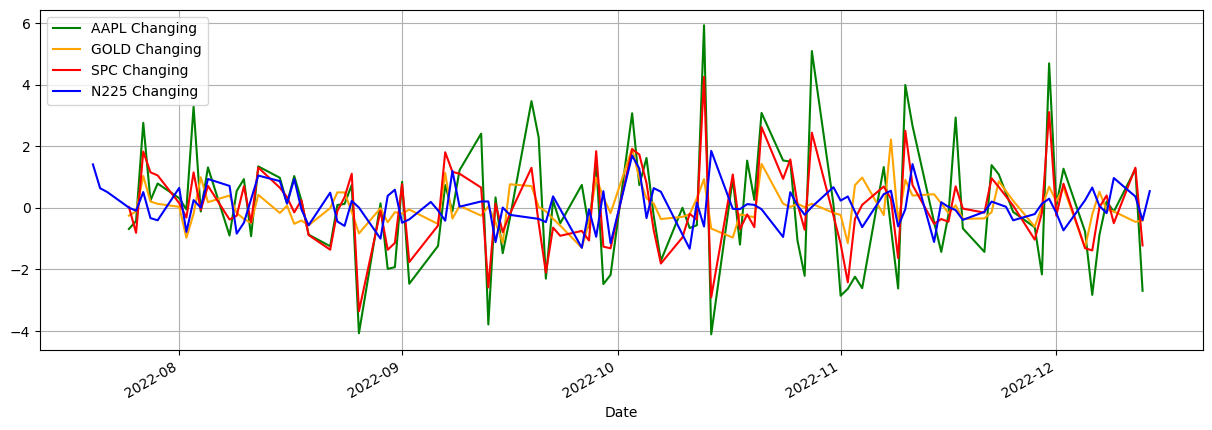

In [5]:
# Show when and what changes are made.
df_aapl['changing'].tail(100).plot(grid=True, figsize=(15,5), color='green', label='AAPL Changing')
df_gold['changing'].tail(100).plot(grid=True, figsize=(15,5), color='orange', label='GOLD Changing')
df_spc['changing'].tail(100).plot(grid=True, figsize=(15,5), color='red', label='SPC Changing')
df_n225['changing'].tail(100).plot(grid=True, figsize=(15,5), color='blue', label='N225 Changing')
plt.legend()
plt.show()

In [6]:
"""Predict stock prices.
"""
df_n225['label'] = df_n225['Close'].shift(-30)
df_n225.tail(35)

,High,Low,Open,Close,Volume,Adj Close,SMA,changing,label
Date,,,,,,,,,
2022-10-25,27337.800781,27073.179688,27113.199219,27250.279297,62200000,27250.279297,26858.156953,0.505584,27574.429688
2022-10-26,27578.050781,27404.900391,27410.640625,27431.839844,61000000,27431.839844,26852.724531,0.077339,27901.009766
2022-10-27,27450.259766,27330.789062,27407.230469,27345.240234,65400000,27345.240234,26838.997344,-0.226182,27842.330078
2022-10-28,27265.460938,26981.080078,27097.380859,27105.199219,144600000,27105.199219,26830.680078,0.028853,27954.849609
2022-10-31,27602.990234,27392.990234,27404.300781,27587.460938,71100000,27587.460938,26848.025313,0.668363,28156.210938
2022-11-01,27682.970703,27526.179688,27614.640625,27678.919922,72600000,27678.919922,26897.920078,0.232773,NaN
2022-11-02,27692.550781,27546.880859,27562.300781,27663.390625,86600000,27663.390625,26941.580937,0.366769,NaN
2022-11-04,27389.300781,27032.019531,27371.890625,27199.740234,111100000,27199.740234,26982.611328,-0.628931,NaN
2022-11-07,27578.009766,27357.529297,27406.779297,27527.640625,78900000,27527.640625,27026.834922,0.440991,NaN


In [7]:
X = np.array(
    df_n225.drop(
        ['label', 'SMA'],
        axis='columns'
    )
)

X = sklearn.preprocessing.scale(X)
X

array([[-1.17484481, -1.08598416, -1.23608287, ...,  0.18031457,
        -1.08881512,  0.77802847],
       [-1.14144614, -1.01894592, -1.00688011, ...,  0.6004872 ,
        -1.0769976 , -0.37114184],
       [-1.16074764, -0.9980632 , -1.13404409, ..., -0.04177668,
        -1.06962238,  0.33720367],
       ...,
       [-0.27788211, -0.11272315, -0.25446682, ..., -1.23626747,
        -0.16145564,  0.46952049],
       [-0.05589834,  0.03796516,  0.03228338, ..., -1.09821074,
        -0.06252983, -0.48086467],
       [ 0.01412774,  0.11319948, -0.02250556, ..., -4.21349072,
         0.11450461,  0.68660914]])

In [8]:
y = np.array(df_n225['label'])
y

array([28519.1796875 , 28242.2109375 , 28633.4609375 , 28523.25976562,
       28756.859375  , 28631.44921875, 28822.2890625 , 28546.1796875 ,
       28635.2109375 , 28197.41992188, 27663.390625  , 28091.05078125,
       28362.16992188, 28646.5       , 28341.94921875, 28779.18945312,
       29388.5       , 29505.9296875 , 29562.9296875 , 29520.0703125 ,
       30084.15039062, 30467.75      , 30292.18945312, 30236.08984375,
       30017.91992188, 30156.02929688, 29671.69921875, 30168.26953125,
       28966.00976562, 29663.5       , 29408.16992188, 29559.09960938,
       28930.109375  , 28864.3203125 , 28743.25      , 29027.93945312,
       29036.56054688, 29211.640625  , 29717.83007812, 29766.97070312,
       29921.08984375, 29914.33007812, 30216.75      , 29792.05078125,
       29174.15039062, 28995.91992188, 28405.51953125, 28729.88085938,
       29176.69921875, 29384.51953125, 29432.69921875, 29178.80078125,
       29388.86914062, 29854.        , 30089.25      , 29696.63085938,
      

In [9]:
# Scope the data range to the last 30 lines before the end.
y = y[:-30]
X = X[:-30]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X,
    y,
    test_size=0.2
)

lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, y_train)
accuracy = lr.score(X_test, y_test)
accuracy

0.11122012278973004

In [10]:
predicted_data = lr.predict(X[-30:])
predicted_data

array([27932.87780026, 27877.1584086 , 28058.66977656, 27829.60613958,
       27679.47778077, 27705.98420585, 27620.54343029, 27513.8595933 ,
       27528.99249663, 27477.00881213, 27370.44663792, 27750.71286119,
       27648.29198878, 27954.77630795, 27809.62471086, 27645.02788349,
       27587.76163893, 27473.40718126, 28005.8609354 , 27479.44696682,
       27554.2337128 , 27882.18806936, 27672.65756324, 27703.88786234,
       27896.99585056, 27867.00066192, 28031.58539149, 27833.63165135,
       28015.53251788, 27903.95386215])

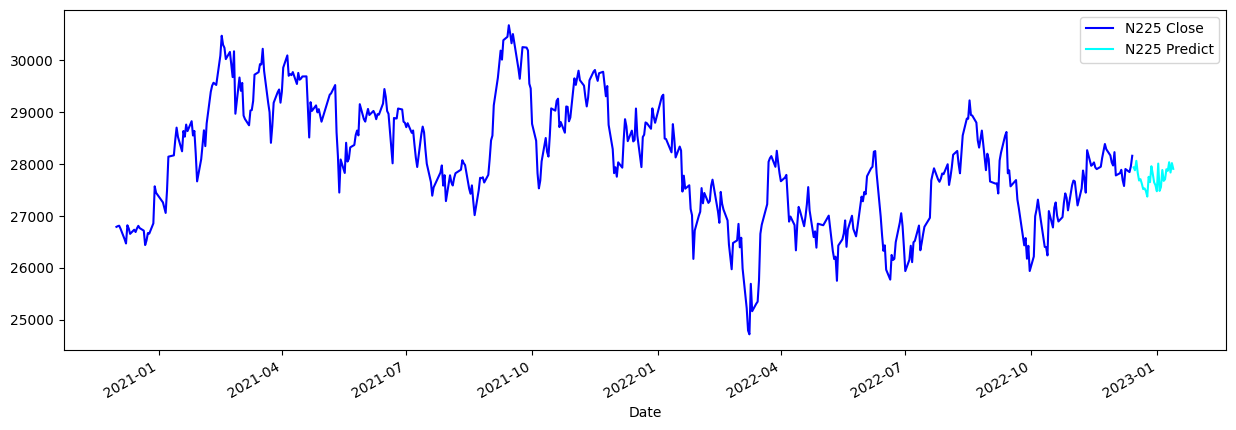

In [11]:
df_n225['Predict'] = np.nan

last_date = df_n225.iloc[-1].name
one_day = 24 * 60 * 60
next_day = last_date.timestamp() + one_day

for data in predicted_data:
    next_date = datetime.datetime.fromtimestamp(next_day)
    df_n225.loc[next_date] = np.append(
        [np.nan] * (len(df_n225.columns) - 1),
        data
    )
    next_day += one_day

df_n225['Close'].plot(figsize=(15,5), color='blue', label='N225 Close')
df_n225['Predict'].plot(figsize=(15,5), color='cyan', label='N225 Predict')
plt.legend()
plt.show()